<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/Data_Science_Assessment_C%C3%A9sar_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
ruta = "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/Test%20Case%20Data%20set.csv"
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv(ruta, sep=",")
df.head(5)

,Rater ID,Week ending date,Market,Jobs Completed,Job Type
0,a3570,4/14/2024,UK-UA,9,ULTRA_SIMPLE
1,a7397,4/14/2024,AR-EG,1,ULTRA_SIMPLE
2,a3961,4/14/2024,AR-EG,3,ULTRA_SIMPLE
3,a7717,4/14/2024,AR-EG,2,VERY_SIMPLE
4,a1366,4/14/2024,SV-SE,1,VERY_SIMPLE


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Rater ID          500000 non-null  object
 1   Week ending date  500000 non-null  object
 2   Market            500000 non-null  object
 3   Jobs Completed    500000 non-null  int64 
 4   Job Type          500000 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.1+ MB


In [137]:
df.describe()

,Jobs Completed
count,500000.000000
mean,22.035744
std,47.169535
min,1.000000
25%,2.000000
50%,7.000000
75%,20.000000
max,1964.000000


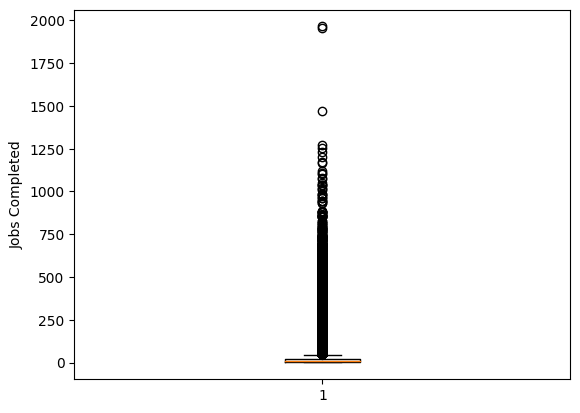

In [138]:
plt.boxplot(df['Jobs Completed'])
plt.ylabel("Jobs Completed")
plt.show()

In [139]:
# Calcular el número óptimo de bins usando la regla de Sturges
n_bins = int(np.ceil(1 + np.log2(len(df['Jobs Completed']))))
print("Número óptimo de bins según la regla de Sturges:", n_bins)

Número óptimo de bins según la regla de Sturges: 20


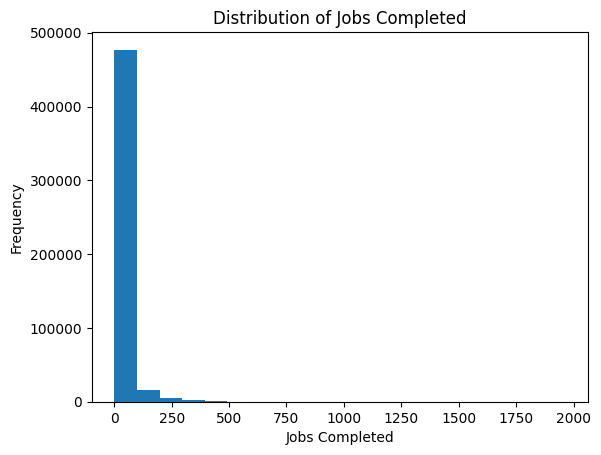

In [140]:
plt.hist(df['Jobs Completed'], bins=20)
plt.xlabel('Jobs Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Jobs Completed')
plt.show()

In [141]:
# Agrupar por 'Market' y 'Week' y sumar los trabajos completados
result = df.groupby(['Week ending date','Market'])['Jobs Completed'].sum().reset_index()
result

,Week ending date,Market,Jobs Completed
0,3/10/2024,AR-EG,151944
1,3/10/2024,BG-BG,5674
2,3/10/2024,BN-IN,5619
3,3/10/2024,CA-ES,2648
4,3/10/2024,CS-CZ,8755
...,...,...,...
312,4/7/2024,UR-IN,1570
313,4/7/2024,VI-VN,96050
314,4/7/2024,ZH-CN,86069
315,4/7/2024,ZH-HK,2115


In [142]:
# Agrupar por 'Week ending date' y contar usuarios únicos
df = df.rename(columns={"Rater ID ": "Rater ID"})

In [143]:
# Agrupar por 'Week ending date' y contar usuarios únicos
users_per_week = df.groupby('Week ending date')['Rater ID'].nunique().reset_index()
users_per_week

,Week ending date,Rater ID
0,3/10/2024,5405
1,3/17/2024,5775
2,3/24/2024,5702
3,3/31/2024,5964
4,4/14/2024,6461
5,4/7/2024,5963


In [144]:
# Agrupar por 'Week ending date' y contar usuarios únicos
users_per_week = df.groupby(['Week ending date', 'Market'])['Rater ID'].nunique().reset_index()
users_per_week

,Week ending date,Market,Rater ID
0,3/10/2024,AR-EG,699
1,3/10/2024,BG-BG,43
2,3/10/2024,BN-IN,32
3,3/10/2024,CA-ES,14
4,3/10/2024,CS-CZ,36
...,...,...,...
312,4/7/2024,UR-IN,18
313,4/7/2024,VI-VN,287
314,4/7/2024,ZH-CN,86
315,4/7/2024,ZH-HK,8


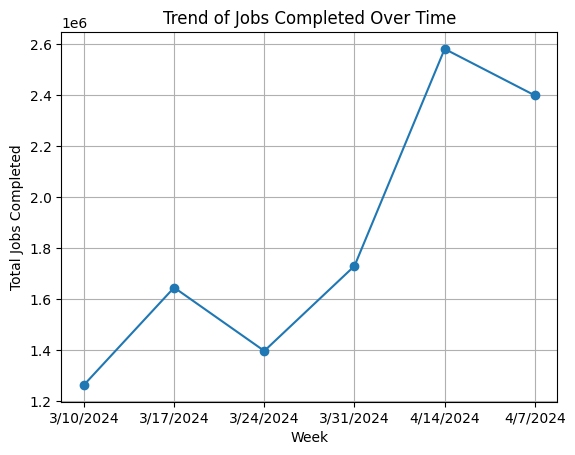

In [145]:
# Calcular el total de trabajos completados por semana
jobs_completed_per_week = df.groupby(df['Week ending date'])['Jobs Completed'].sum()

# Graficar la tendencia temporal
plt.plot(jobs_completed_per_week.index, jobs_completed_per_week.values, marker='o')
plt.xlabel('Week')
plt.ylabel('Total Jobs Completed')
plt.title('Trend of Jobs Completed Over Time')
plt.grid(True)
plt.show()

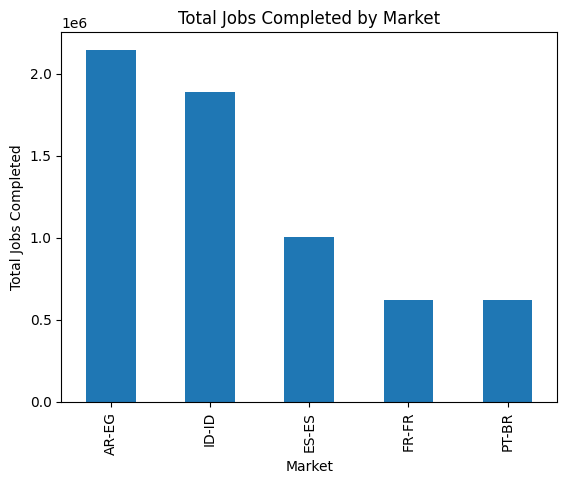

In [146]:
# Calcular el total de trabajos completados por mercado
jobs_completed_per_market = df.groupby('Market')['Jobs Completed'].sum().sort_values(ascending = False).head(5)

# Graficar la comparación entre mercados
jobs_completed_per_market.plot(kind='bar', rot=90)
plt.xlabel('Market')
plt.ylabel('Total Jobs Completed')
plt.title('Total Jobs Completed by Market')
plt.show()

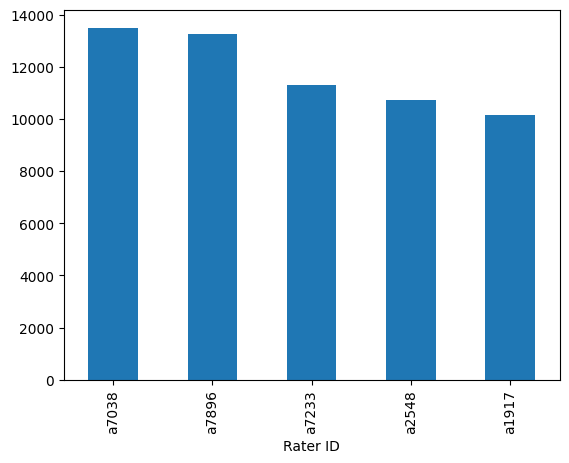

In [147]:
# Calcular la cantidad total de trabajos completados por usuario
jobs_completed_per_user = df.groupby('Rater ID')['Jobs Completed'].sum().sort_values(ascending = False).head(5)
jobs_completed_per_user.plot(kind='bar')
plt.show()

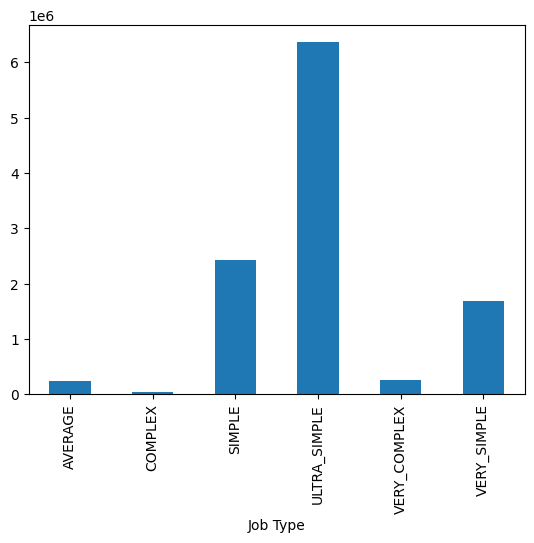

In [148]:
# Calcular el total de trabajos completados por semana
jobs_completed_per_job_type = df.groupby(df['Job Type'])['Jobs Completed'].sum()
jobs_completed_per_job_type.plot(kind='bar')
plt.show()